In [112]:
import random

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Инициализация словаря, который будет использоваться при генерации пароля

In [113]:
lowercase_letters__ru = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
uppercase_letters_ru = 'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ'
digits = '0123456789'

symb_dicts = [lowercase_letters__ru, uppercase_letters_ru, digits]

symb_dicts

['абвгдеёжзийклмнопрстуфхцчшщъыьэюя',
 'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ',
 '0123456789']

### Функция, генерирующая пароль

In [114]:
def generate_password(length: int) -> str:
    if length <= 0:
        return ''

    res = list()
    global symb_dicts
    
    symb_dict = ''.join(symb_dicts)
    res = [random.choice(symb_dict) for _ in range(length)]
        
    return ''.join(res)

In [115]:
def generate_fix_password(length: int) -> str:
    if length <= 0:
        return ''

    res = list()
    global symb_dicts
    
    dicts_num = len(symb_dicts)
    std_size = length // dicts_num
    ex_size = length % dicts_num

    for symb_dict in symb_dicts:
        res.append(''.join([random.choice(symb_dict) for _ in range(std_size)]))
        
    for i in range(ex_size):
        res.append(random.choice(random.choice(symb_dicts)))
    
    res = list(''.join(res))
    random.shuffle(res)
    res = ''.join(res)
    
    return res

In [116]:
print('Password: ', generate_password(40))
print('Fixed password: ', generate_fix_password(40))

Password:  ЮГз9ббйзХРиГДЬА0ЬяцаЖякшюмпфЮ1ркАЩЯШЁБ4Е
Fixed password:  ЗтОЛ08я31РфъдмЙ9ЁЭ49Чэх2л6х1з9ВЮ9МВ6очйМ


In [117]:
def count_dist(password: str) -> list[int]:
    global symb_dicts
    res = list()
    password_count = Counter(password)
    for symb_dict in symb_dicts:
        s = 0
        for symb in symb_dict:
            s += password_count.get(symb, 0)
        res.append(s) 
        
    return res           
    
count_dist(generate_password(30))

[13, 12, 5]

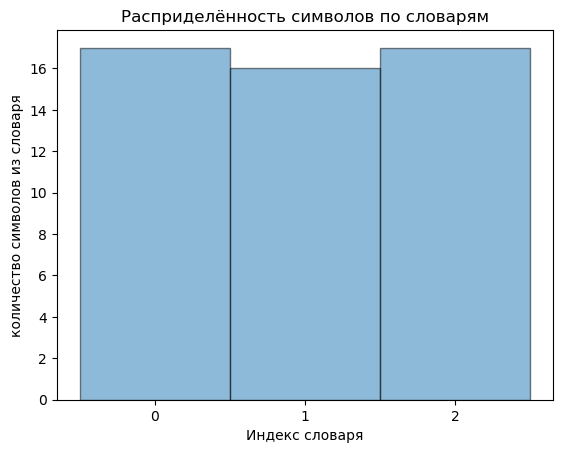

In [122]:
password = generate_password(50)
fix_password = generate_fix_password(50)
y_values = count_dist(fix_password)
x_values = list(range(len(symb_dicts)))

bars = plt.bar(x_values, y_values, edgecolor='black', alpha=0.5, width=1) 



plt.title('Расприделённость символов по словарям')
plt.xlabel('Индекс словаря')
plt.ylabel('количество символов из словаря')

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.xticks(x_values)


plt.show()

In [119]:
def count_iteretions_num(length: int):
    global symb_dicts
    dict_size = len(''.join(symb_dicts))
    return dict_size ** length

In [129]:
size = 10
x = [i for i in range(1, 51)]
y = [count_iteretions_num(i) for i in x]

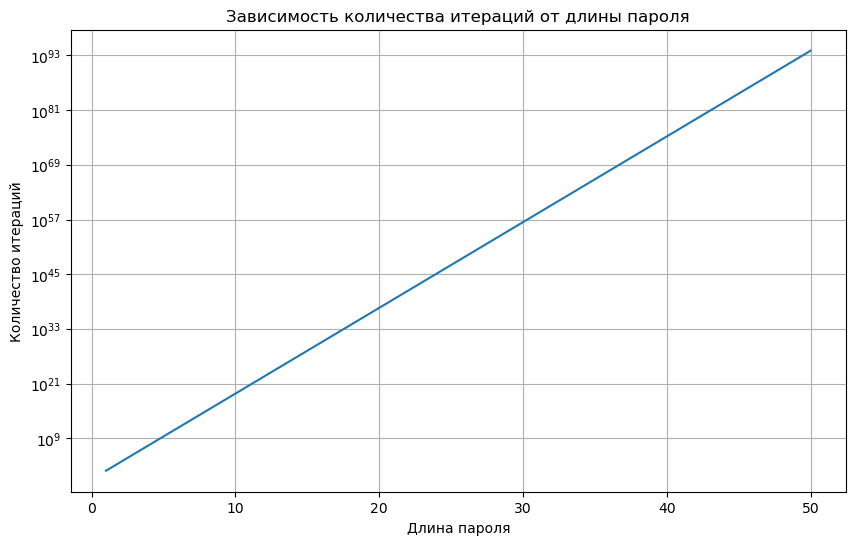

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)

plt.title('Зависимость количества итераций от длины пароля')
plt.xlabel('Длина пароля')
plt.ylabel('Количество итераций')

plt.yscale('log')

plt.grid(True)
plt.show()